In [46]:
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [92]:
def get_principle_components(k):
    columns = ['Sepal length in cm', 'Sepal width in cm', 'Petal length in cm', 'Petal width in cm', 'Class']
    df = pd.read_csv('irisdata.sec', names=columns)

    df['Class'] = df['Class'].astype('category')
    df['Class'] = df['Class'].cat.codes

    data_numeric = df.loc[:, ~df.columns.str.contains('Class')]
    data_numeric = data_numeric.to_numpy()

    N, M = data_numeric.shape

    data_mean = np.true_divide(sum(data_numeric),N)   
    data_centered = data_numeric - data_mean

    covariance_matrix = np.matmul(data_centered.T, data_centered) / N
    
    eigenvalues, eigenvectors = la.eig(covariance_matrix)
    transformation = eigenvectors[:,0:k]

    principal_components= np.matmul(data_centered,transformation)

    return principal_components






In [93]:
def PCA_for_irisData(k):
    if k<1 or k>3:
        print("invalid k")
        return

    principle_components = get_principle_components(k) 
    # create figure to plot
    fig = plt.figure(1, figsize=(8, 6))   
    if k == 1:

        # generate plot from principal components
        scatter = plt.scatter(principle_components, 0*principle_components, c=df['Class'])
    
        # add a legend
        handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
        plt.legend(handles, ("Iris Setosa", "Iris Versicolor", "Iris Virginica"))
        plt.show()
    elif k == 2:

        # generate scatter data from principal components
        scatter = plt.scatter(principle_components[:, 0], principle_components[:, 1], c=df['Class'], edgecolor='k')
        
        # add a legend
        handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
        plt.legend(handles, ("Iris Setosa", "Iris Versicolor", "Iris Virginica"))
        plt.show()
    else:        
        # create 3D view with certain angle
        ax = Axes3D(fig, elev=-130, azim=130)
        
        # generate scatter data from principal components
        scatter = ax.scatter(principle_components[:, 0], principle_components[:, 1], principle_components[:, 2], c=df['Class'], edgecolor='k', s=50)
            
        # add a legend in lower left corner
        handles, labels = scatter.legend_elements(prop="colors", alpha=0.7)
        legend = ax.legend(handles, ("Iris Setosa", "Iris Versicolor", "Iris Virginica"), loc="lower left", title="Classes")    
        ax.add_artist(legend)
        plt.show()




/var/folders/93/vlx4nms139q5z39xrctn9jjw0000gn/T/ipykernel_1252/947516923.py:29: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-130, azim=130)


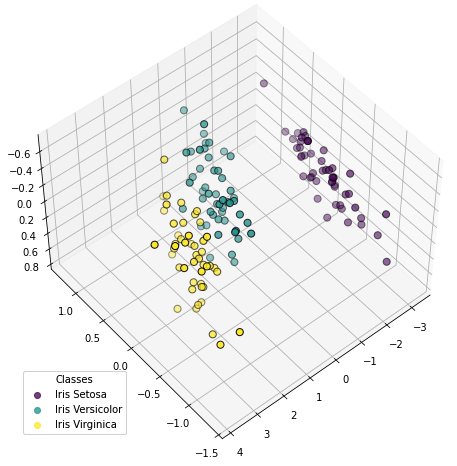

In [94]:
PCA_for_irisData(3)